In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-09 10:12:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-09 10:12:32 (68.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-09 10:12:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   179MB/s    in 0.9s    

2023-06-09 10:12:45 (179 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [7]:
import tensorflow as tf
IMG_SIZE = (224, 224)

In [8]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [10]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[7.25969391e+01 3.95969391e+01 3.20255089e+01]
   [7.76173477e+01 4.42806129e+01 3.20918388e+01]
   [7.37857132e+01 5.05561256e+01 3.80714340e+01]
   ...
   [1.00662909e+01 1.70662899e+01 9.28055477e+00]
   [1.00255146e+01 1.60255146e+01 6.02551508e+00]
   [1.23265553e+01 1.53265553e+01 6.32655525e+00]]

  [[7.24489746e+01 4.32857170e+01 2.95255108e+01]
   [7.43418350e+01 4.13367310e+01 2.46275482e+01]
   [8.01734695e+01 5.27908173e+01 3.95612259e+01]
   ...
   [1.45306320e+01 1.95306320e+01 1.27448959e+01]
   [1.27244663e+01 1.77244663e+01 1.07244663e+01]
   [1.05458813e+01 1.35458813e+01 4.54588127e+00]]

  [[7.51326523e+01 4.71326523e+01 2.59183655e+01]
   [7.63673477e+01 4.43673477e+01 2.33367348e+01]
   [7.47602005e+01 4.17602043e+01 2.80459194e+01]
   ...
   [1.15460005e+01 1.41174288e+01 7.33171463e+00]
   [1.23316154e+01 1.53316154e+01 8.33161545e+00]
   [1.14184227e+01 1.44184227e+01 7.41842270e+00]]

  ...

  [[1.40780670e+02 1.29423462e+02 1.15770432e+02]
   [1

In [12]:
IMG_SIZE+(3,)

(224, 224, 3)

In [13]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

x = base_model(inputs)

print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Shape after GlobalAveragePooling2D(): {x.shape}")

16705208/16705208 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D(): (None, 1280)


In [14]:
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

In [15]:
model_0 = tf.keras.Model(inputs, outputs)

In [16]:
model_0.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

In [17]:
model_0_history = model_0.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_10_percent,
                                validation_steps=int(0.25 * len(test_data_10_percent)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230609-101255
Epoch 1/5


2023-06-09 10:13:02.496044: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


24/24 [==============================] - 21s 245ms/step - loss: 1.8174 - accuracy: 0.4640 - val_loss: 1.2840 - val_accuracy: 0.7270
Epoch 2/5
24/24 [==============================] - 5s 180ms/step - loss: 1.0639 - accuracy: 0.7733 - val_loss: 0.8790 - val_accuracy: 0.8207
Epoch 3/5
24/24 [==============================] - 5s 178ms/step - loss: 0.7719 - accuracy: 0.8360 - val_loss: 0.7132 - val_accuracy: 0.8306
Epoch 4/5
24/24 [==============================] - 4s 145ms/step - loss: 0.6238 - accuracy: 0.8493 - val_loss: 0.6213 - val_accuracy: 0.8503
Epoch 5/5
24/24 [==============================] - 4s 151ms/step - loss: 0.5396 - accuracy: 0.8827 - val_loss: 0.5576 - val_accuracy: 0.8635


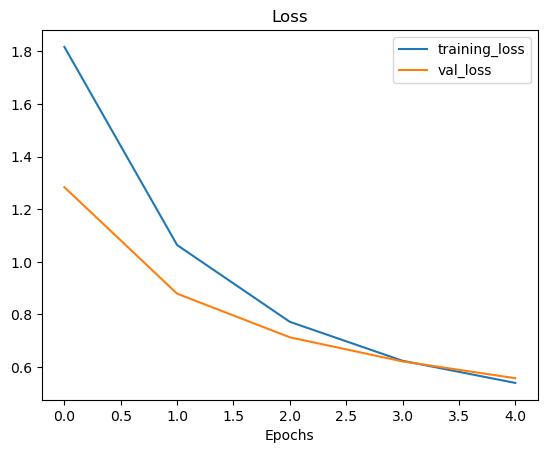

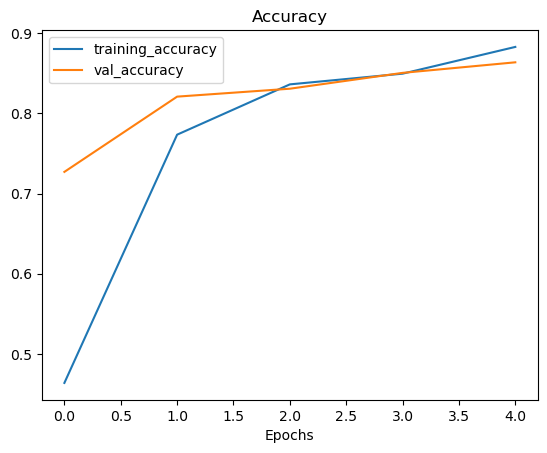

In [18]:
plot_loss_curves(model_0_history)

In [19]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [20]:
len(base_model.layers)

238

In [21]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [22]:
len(model_0.layers)

4

### Feature vector and `tf.keras.layers.GlobalAveragePooling2D()`

In [23]:
input_shape = (1, 4, 5, 3)

tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
print(f"Random tensor: \n {input_tensor} \n")

average_pooling_2D = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"After global 2D pooling: \n {average_pooling_2D} \n")

Random tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]
   [-0.59722406 -1.9171132  -0.62044144]]

  [[ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]
   [ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]]

  [[ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]
   [-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]]

  [[-0.35819843  0.88698614  0.52744764]
   [ 0.70402247 -0.33421248  0.21639644]
   [-0.97485447 -0.20757681 -0.03647729]
   [-1.3353444   0.6885855   1.1110833 ]
   [ 0.40130252  0.6320586  -0.39030614]]]] 

After global 2D pooling: 
 [[-0.13519286 -0.32778087 -0.18581301]] 



In [24]:
print(f"average_pooling_2D shape: {average_pooling_2D.shape}")
print(f"random tensor shape: {input_tensor.shape}")

average_pooling_2D shape: (1, 3)
random tensor shape: (1, 4, 5, 3)


As we can see `GlobalAveragePooling2D()` converts the tensor to a vector ( (4, 5) is gone after average poling).<br>  

In [25]:
cstom_reduce = tf.reduce_mean(input_tensor, axis=[1, 2])
print(f"Custom reduce: {cstom_reduce} \n")
print(f"After global 2D pooling: {average_pooling_2D} \n")

Custom reduce: [[-0.13519286 -0.32778087 -0.18581301]] 

After global 2D pooling: [[-0.13519286 -0.32778087 -0.18581301]] 



Let's do a quick experiment with `tf.keras.layers.GlobalMaxPool2D()`

In [26]:
pooling_2D = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"After max pool 2D: {pooling_2D}")
print(f"After global 2D pooling: {average_pooling_2D} ")

After max pool 2D: [[0.9058464 1.1603122 1.6994323]]
After global 2D pooling: [[-0.13519286 -0.32778087 -0.18581301]] 


## Creating `model_1` (1% data with data augmentation)

In [27]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

In [28]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-06-09 10:13:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  64.1MB/s    in 2.0s    

2023-06-09 10:13:46 (64.1 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [29]:
unzip_data("10_food_classes_1_percent.zip")

In [30]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [31]:
walk_through_dir(train_dir_1_percent)

There are 10 directories and 0 images in '10_food_classes_1_percent/train/'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.


In [32]:
IMG_SIZE = (224, 224)
train_data_1_percent = preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                  label_mode="categorical",
                                                                  image_size=IMG_SIZE,
                                                                  batch_size=32)

test_data = preprocessing.image_dataset_from_directory(test_dir,
                                                       label_mode="categorical",
                                                       image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [33]:
image_augmentation = tf.keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
], name="image_augmentation")

In [34]:
# view a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

(-0.5, 412.5, 436.5, -0.5)

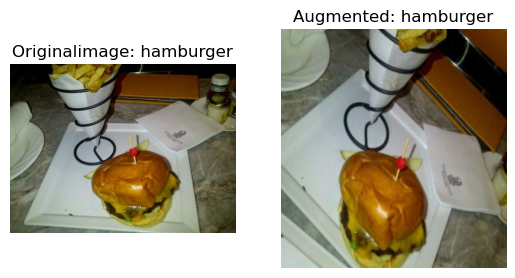

In [35]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"Originalimage: {target_class}")
plt.axis(False)

augmented_img = image_augmentation(img/255.)
plt.subplot(1, 2, 2)
plt.imshow(augmented_img)
plt.title(f"Augmented: {target_class}")
plt.axis(False)

In [36]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = image_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

24274472/24274472 [==============================] - 0s 0us/step


In [37]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
model_1_history = model_1.fit(train_data_1_percent,
                  epochs=5,
                  steps_per_epoch=len(train_data_1_percent),
                  validation_data=test_data,
                  validation_steps=int(0.25 * len(test_data)),
                  callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_augmentation")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmentation/20230609-101352
Epoch 1/5
3/3 [==============================] - 15s 3s/step - loss: 2.2862 - accuracy: 0.1571 - val_loss: 2.1770 - val_accuracy: 0.1941
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0770 - accuracy: 0.2857 - val_loss: 2.0719 - val_accuracy: 0.3059
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 1.8372 - accuracy: 0.4857 - val_loss: 1.9638 - val_accuracy: 0.4062
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7750 - accuracy: 0.5714 - val_loss: 1.8893 - val_accuracy: 0.4391
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6291 - accuracy: 0.5714 - val_loss: 1.7924 - val_accuracy: 0.4819


In [39]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 image_augmentation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [40]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 7s 80ms/step - loss: 1.8078 - accuracy: 0.4748


[1.8078367710113525, 0.4747999906539917]

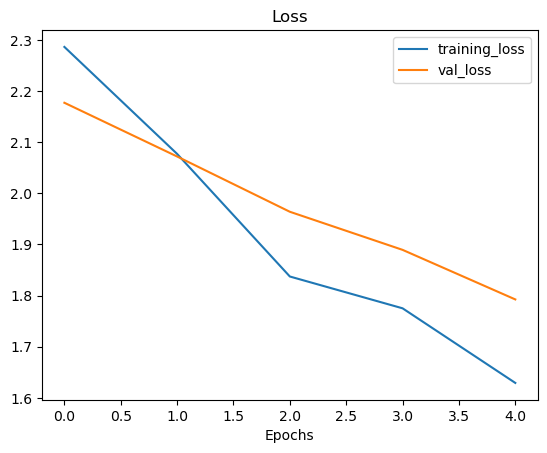

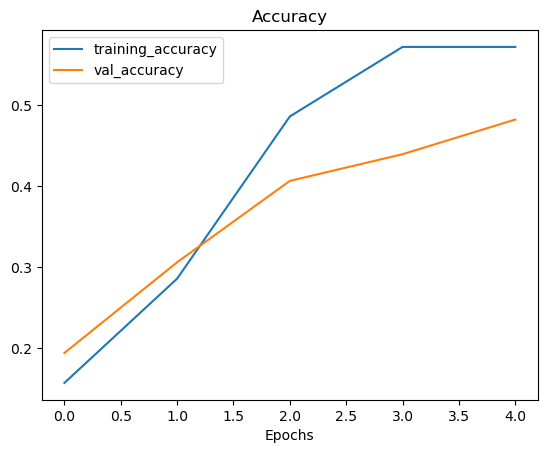

In [41]:
plot_loss_curves(model_1_history)

## Create `model_2` with 10% data and augmentation

In [42]:
test_dir = '10_food_classes_10_percent/test/'

In [43]:
train_data_10_percent = preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE,
                                                                   batch_size=32)
                                                               
test_data = preprocessing.image_dataset_from_directory(test_dir,
                                                      label_mode="categorical",
                                                      image_size=IMG_SIZE,
                                                      batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [44]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = image_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

In [45]:
model_2 = tf.keras.Model(inputs, outputs)

In [46]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [47]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        save_freq="epoch",
                                                        verbose=1)

In [48]:
model_2_history = model_2.fit(train_data_10_percent,
                             epochs=5,
                             steps_per_epoch=len(train_data_10_percent),
                             validation_data=test_data,
                             validation_steps=int(0.25 * len(test_data)),
                             callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_augmentation"),
                                       checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmentation/20230609-101434
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0074 - accuracy: 0.3067
Epoch 1: val_loss improved from inf to 1.56458, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 28s 772ms/step - loss: 2.0074 - accuracy: 0.3067 - val_loss: 1.5646 - val_accuracy: 0.5806
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4482 - accuracy: 0.6133
Epoch 2: val_loss improved from 1.56458 to 1.11100, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 16s 654ms/step - loss: 1.4482 - accuracy: 0.6133 - val_loss: 1.1110 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1567 - accuracy: 0.7133
Epoch 3: val_loss improved from 1.11100 to 0.93431, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt

In [49]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 65ms/step - loss: 0.7177 - accuracy: 0.8088


[0.7176924347877502, 0.8087999820709229]

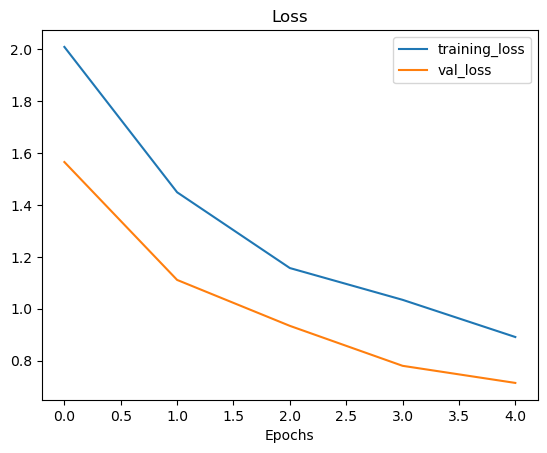

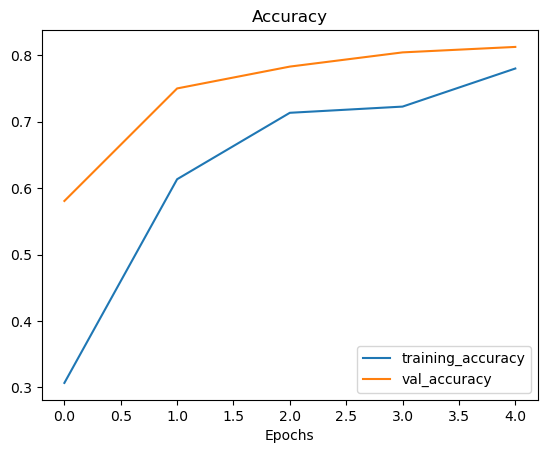

In [50]:
plot_loss_curves(model_2_history)

In [51]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 65ms/step - loss: 0.7177 - accuracy: 0.8088


In [52]:
results_10_percent_data_aug == loaded_weights_model_results

False

In [53]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 image_augmentation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

## Creating `model_3`

In [54]:
model_2.layers

In [55]:
for layer in model_2.layers:
    print(layer.trainable)

True
True
False
True
True


In [56]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 image_augmentation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [57]:
print(len(model_2.layers[2].trainable_variables))

0


In [58]:
print(base_model.trainable_variables)

[]


In [59]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [60]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

In [61]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower for fine tuning
               metrics=["accuracy"])

In [62]:
for layer in model_2.layers:
    print(layer.trainable)

True
True
True
True
True


In [63]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

Last 10 layers are now trainabale

In [64]:
print(len(model_2.layers[2].trainable_variables))

10


In [65]:
model_2_history.epoch

[0, 1, 2, 3, 4]

In [66]:
fine_tune_epochs = 5 + 5

model_3_history = model_2.fit(train_data_10_percent,
                             epochs=fine_tune_epochs,
                             validation_data=test_data,
                             initial_epoch=model_2_history.epoch[-1],
                             validation_steps=int(0.25 * len(test_data)),
                             callbacks=[create_tensorboard_callback("transfer_learning", "unfrizing_some_layer_of_base_model")])

Saving TensorBoard log files to: transfer_learning/unfrizing_some_layer_of_base_model/20230609-101638
Epoch 5/10
24/24 [==============================] - 28s 680ms/step - loss: 0.7627 - accuracy: 0.7867 - val_loss: 0.5337 - val_accuracy: 0.8273
Epoch 6/10
24/24 [==============================] - 13s 538ms/step - loss: 0.6760 - accuracy: 0.7960 - val_loss: 0.5034 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 12s 493ms/step - loss: 0.5847 - accuracy: 0.8280 - val_loss: 0.4657 - val_accuracy: 0.8372
Epoch 8/10
24/24 [==============================] - 12s 467ms/step - loss: 0.5848 - accuracy: 0.8173 - val_loss: 0.4856 - val_accuracy: 0.8339
Epoch 9/10
24/24 [==============================] - 11s 458ms/step - loss: 0.5370 - accuracy: 0.8227 - val_loss: 0.4641 - val_accuracy: 0.8405
Epoch 10/10
24/24 [==============================] - 12s 484ms/step - loss: 0.5178 - accuracy: 0.8320 - val_loss: 0.4142 - val_accuracy: 0.8520


In [67]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.4693 - accuracy: 0.8420


In [68]:

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

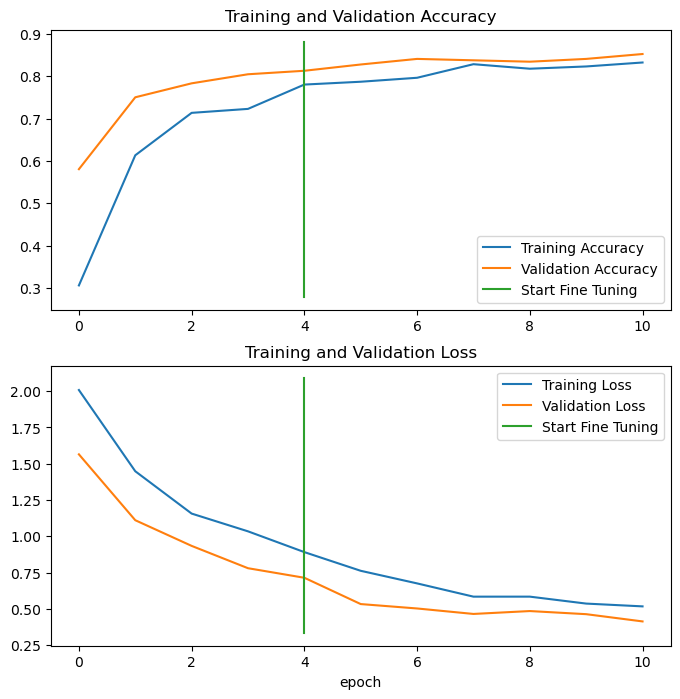

In [69]:
compare_historys(model_2_history, model_3_history)

### `model_4`

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [71]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-06-09 10:18:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 209.85.200.128, 142.251.171.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   271MB/s    in 1.8s    

2023-06-09 10:18:34 (271 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [72]:
unzip_data("10_food_classes_all_data.zip")

In [73]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [74]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [75]:
train_datagen = keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 image_size=(224, 224))

test_datagen = keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                batch_size=32,
                                                                image_size=(224, 224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [92]:
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

In [93]:
image_augmentation = keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
])

In [94]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")

x = image_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

In [95]:
model_4 = keras.Model(inputs, outputs)

In [96]:
model_4.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [97]:
model_4_history = model_4.fit(train_datagen,
                              epochs=5,
                              steps_per_epoch=len(train_datagen),
                              validation_data=test_datagen,
                              validation_steps=int(len(test_datagen) * 0.25),
                              callbacks=[create_tensorboard_callback("transfer_learning", "full_data_augment")])

Saving TensorBoard log files to: transfer_learning/full_data_augment/20230609-103801
Epoch 1/5
235/235 [==============================] - 44s 152ms/step - loss: 1.0863 - accuracy: 0.6860 - val_loss: 0.5165 - val_accuracy: 0.8372
Epoch 2/5
235/235 [==============================] - 33s 140ms/step - loss: 0.6757 - accuracy: 0.7951 - val_loss: 0.3942 - val_accuracy: 0.8717
Epoch 3/5
235/235 [==============================] - 32s 135ms/step - loss: 0.6055 - accuracy: 0.8089 - val_loss: 0.3847 - val_accuracy: 0.8602
Epoch 4/5
235/235 [==============================] - 32s 132ms/step - loss: 0.5461 - accuracy: 0.8304 - val_loss: 0.3293 - val_accuracy: 0.8914
Epoch 5/5
235/235 [==============================] - 29s 122ms/step - loss: 0.5351 - accuracy: 0.8280 - val_loss: 0.3264 - val_accuracy: 0.8964


In [98]:
model_4.evaluate(test_datagen)

79/79 [==============================] - 6s 75ms/step - loss: 0.3163 - accuracy: 0.8976


[0.31630054116249084, 0.897599995136261]

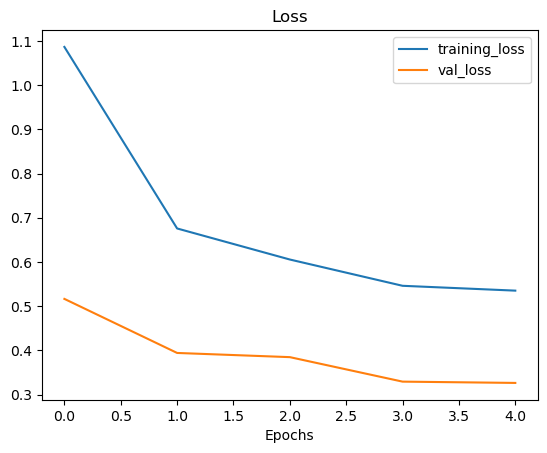

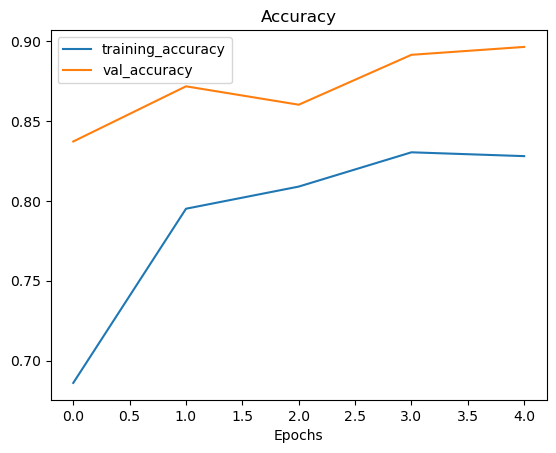

In [99]:
plot_loss_curves(model_4_history)

We will now unfreeze last 10 layers of the `base_model` 

In [100]:
base_model.trainable = True

In [101]:
for layer in base_model.layers[:-10]:
    layer.trainable = False 

In [102]:
model_4.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # for scaling reduce th lr by 10x
               metrics=["accuracy"])

In [103]:
model_4_unfreeze_history = model_4.fit(train_datagen,
                              epochs=10,
                              steps_per_epoch=len(train_datagen),
                              initial_epoch=model_4_history.epoch[-1],
                              validation_data=test_datagen,
                              validation_steps=int(len(test_datagen) * 0.25),
                              callbacks=[create_tensorboard_callback("transfer_learning", "full_data_augment_unfrezee")])

Saving TensorBoard log files to: transfer_learning/full_data_augment_unfrezee/20230609-104115
Epoch 5/10
235/235 [==============================] - 41s 134ms/step - loss: 0.4886 - accuracy: 0.8393 - val_loss: 0.2825 - val_accuracy: 0.9030
Epoch 6/10
235/235 [==============================] - 29s 122ms/step - loss: 0.4552 - accuracy: 0.8536 - val_loss: 0.2813 - val_accuracy: 0.8931
Epoch 7/10
235/235 [==============================] - 27s 115ms/step - loss: 0.4193 - accuracy: 0.8623 - val_loss: 0.2724 - val_accuracy: 0.9079
Epoch 8/10
235/235 [==============================] - 28s 117ms/step - loss: 0.3982 - accuracy: 0.8681 - val_loss: 0.2843 - val_accuracy: 0.9062
Epoch 9/10
235/235 [==============================] - 26s 109ms/step - loss: 0.3843 - accuracy: 0.8727 - val_loss: 0.2686 - val_accuracy: 0.9079
Epoch 10/10
235/235 [==============================] - 28s 115ms/step - loss: 0.3591 - accuracy: 0.8824 - val_loss: 0.2737 - val_accuracy: 0.9128


In [104]:
model_4.evaluate(test_datagen)

79/79 [==============================] - 6s 66ms/step - loss: 0.2434 - accuracy: 0.9220


[0.24340961873531342, 0.921999990940094]

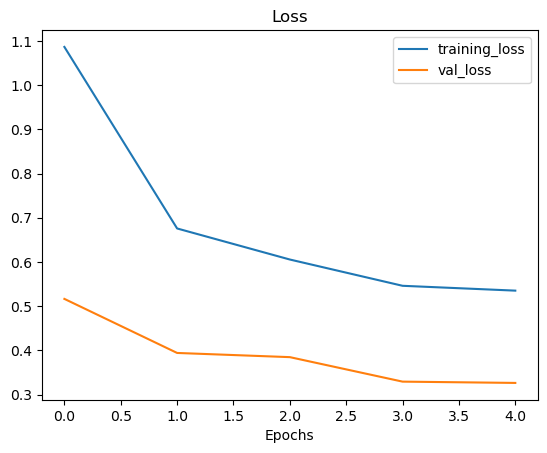

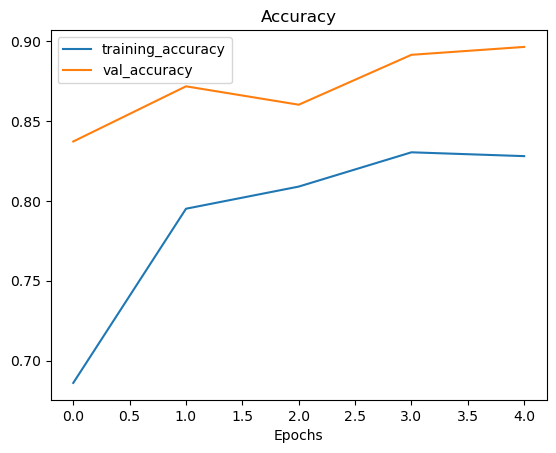

In [105]:
plot_loss_curves(model_4_history)

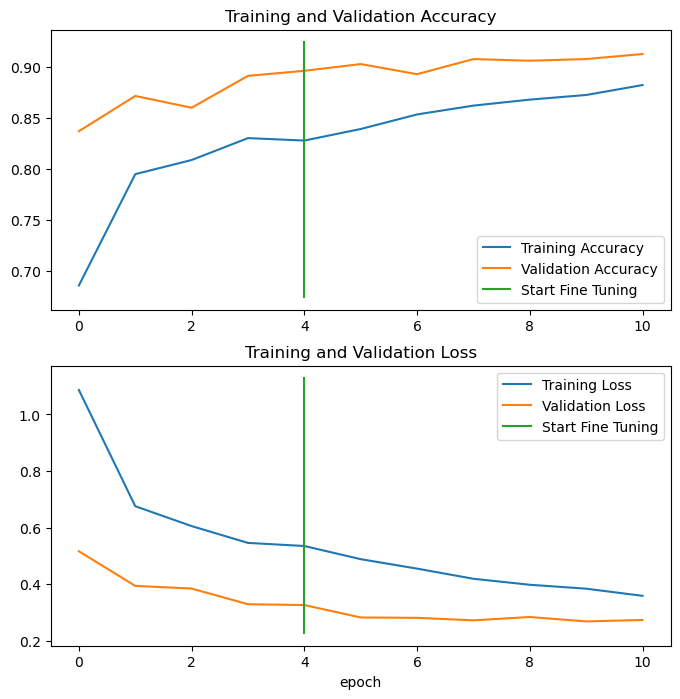

In [106]:
compare_historys(model_4_history, model_4_unfreeze_history)